# Линейные методы в машинном обучении

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

### Задача оптимизации для линейной регрессии:

$$\overline{(<w, x> - y_{true})^2} \rightarrow \min_{w}.$$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

Сгенерируем искусственные данные. 

In [2]:
X = np.linspace(-5, 5, 20)
y = 10 * X - 7

X_train = X[0::2].reshape(-1, 1)
y_train = y[0::2] + np.random.randn(10) * 10

X_test = X[1::2].reshape(-1, 1)
y_test = y[1::2] + np.random.randn(10) * 10

Визуализируем данные, используя библиотеку matplotlib.

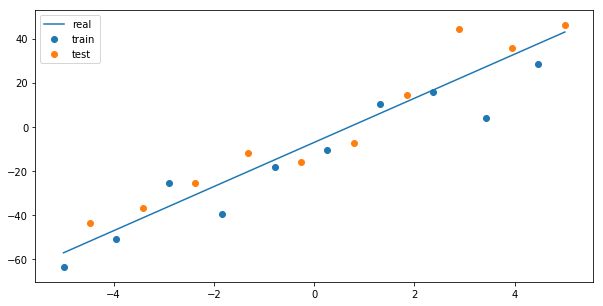

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

Обучим нашу модель на тренировочной выборке и предскажем значения на тесте.
Предсказанные ответы сохраним в переменную $\textbf{predictions}$, а веса модели сохраним в переменные $\textbf{w}$, $b$.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()


In [6]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

w = model.coef_
b = model.intercept_

In [8]:
w, b

(array([9.04687286]), -12.510003648183162)

Визуализируем предсказания.

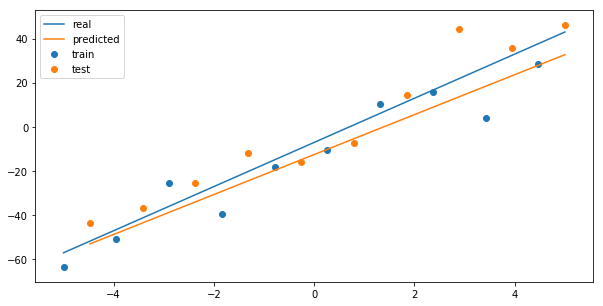

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Оценка результатов

Вычислим среднеквадратичную ошибку на трейне и на тесте. Также вычислим среднюю абсолютную ошибку.

In [9]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  70.21218509502212
Test MSE:  176.23078037310316


In [11]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

from sklearn.metrics import r2_score

print('Train R2: ', r2_score(y_train, y_train_predicted))
print('Test R2: ', r2_score(y_test, y_test_predicted))

Train MAE:  6.639300417586779
Test MAE:  10.719866990156362
Train R2:  0.9142067354119041
Test R2:  0.8225244078843247


# Реальный датасет

Будем работать с датасетом boston. Этот датасет описывает средние цены на недвижимость в районах Бостона в $1000. 
Примеры признаков города: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д.

Загрузим датасет, выведем информацию

In [12]:
from sklearn.datasets import load_boston

In [13]:
house_data = load_boston()

In [14]:
print(house_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [19]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Визуализируем распределения признаков в датасете

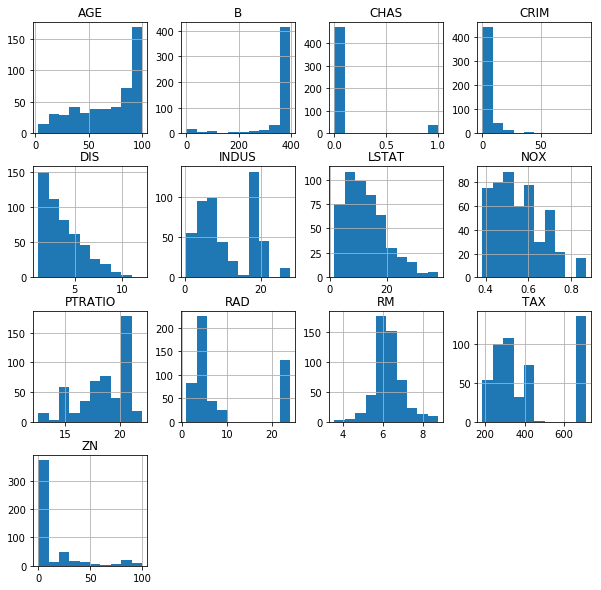

In [22]:
_ = X.hist(X.columns, figsize=(10, 10))

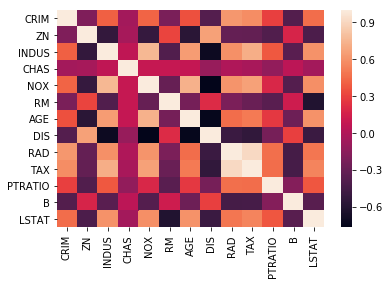

In [23]:
import seaborn as sns

sns.heatmap(X.corr())

Сделаем предсказание: какие факторы окажутся наиболее значимыми и в какую сторону?
Разобьём выборку на train и test в соотношении 70/30.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

/home/yury/ml_shad/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Выполним нормировку данных

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Обучение на реальных данных



In [26]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)


In [27]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

print('Train r2: ', r2_score(y_train, y_train_prediction))
print('Test r2: ', r2_score(y_test, y_test_prediction))

Train MSE:  20.794423956828783
Test MSE:  25.28880007334873
Train MAE:  3.108105237734704
Test MAE:  3.515450855009675
Train r2:  0.7351071965272095
Test r2:  0.7410484441508665


<BarContainer object of 13 artists>

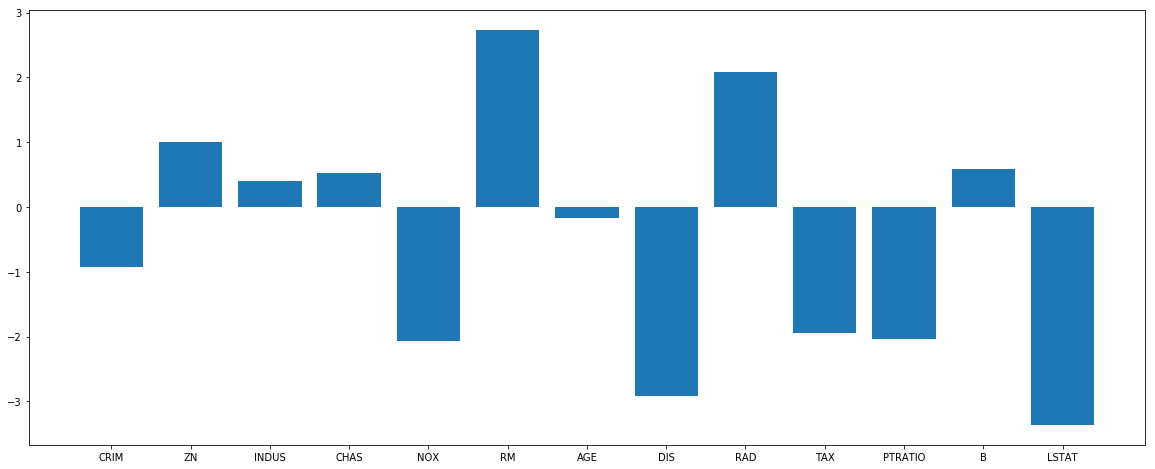

In [28]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

In [31]:
list(zip(X.columns, model.coef_))

[('CRIM', -0.932882063639111),
 ('ZN', 1.0028478155828768),
 ('INDUS', 0.4052929567773267),
 ('CHAS', 0.5295358901127107),
 ('NOX', -2.061207254421628),
 ('RM', 2.7375320558544307),
 ('AGE', -0.17259838751338907),
 ('DIS', -2.9229228228054827),
 ('RAD', 2.0792976204653817),
 ('TAX', -1.9422049554314926),
 ('PTRATIO', -2.043499207886221),
 ('B', 0.5837716258062644),
 ('LSTAT', -3.3646508864126257)]

Сделайте выводы. Какие факторы оказались самыми значимым? Какие оказались незначимыми? Подтвердились ли ваши догадки?

## Ridge & Lasso

Попытаемся исправить проблему переобучения для линейной регрессии. Замечено, что линейная регрессия переобучается, когда вектор весов имеет очень большие значения. Постараемся избежать этого, прибавив к функции потерь дополнительное слагаемое.

### Ridge regression:
$$L(x, y) = \overline{(<w, x> - y_{true})^2} + \lambda ||w||^2 \rightarrow \min_{w}.$$

### Lasso regression:

$$L(x, y) = \overline{(<w, x> - y_{true})^2} + \lambda ||w|| \rightarrow \min_{w}.$$

In [ ]:
from sklearn.linear_model import Ridge, Lasso

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

In [ ]:
alphas = np.linspace(1, 1000, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.show()

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

In [ ]:
alphas = np.linspace(0.1, 1, 100)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.grid()
plt.show()

Визуализируем получившиеся веса

## Обучение Ridge и Lasso

Обучим модели Ridge и Lasso и подсчитайте ошибку на тесте. Постараемся подобрать лучшие параметры регуляризации.

In [ ]:
#Ваш код

# Линейные методы классификации

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Создадим два кластера с данными для решения задачи классификации.

In [33]:
from sklearn.datasets import make_blobs

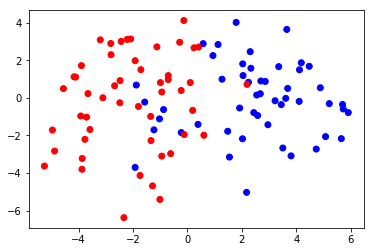

In [34]:
colors = ("red", "blue")
X, y = make_blobs(n_samples=100, centers=[[-2,0], [2,0]], random_state=20, cluster_std=2)

colored_y = np.zeros(y.size, dtype=str)
for i in range(2):
    colored_y[y == i] = colors[i]
    
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [35]:
x_min, x_max = -12, 12
y_min, y_max = -10, 10
h = 0.05
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

## Обучим логистическую регрессию

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression()
model.fit(X, y)

/home/yury/ml_shad/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Визуализируем предсказания

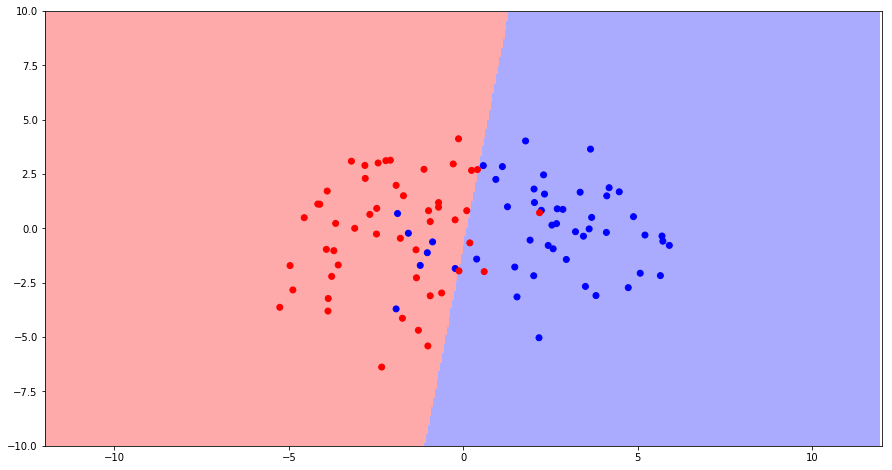

In [38]:
plt.figure(figsize=(15,8))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

## Реальный датасет

Рассмотрим работу алгоритмов линейной классификации для задачи breast cancer. Датасет содержит в себе данные о пациентках. Целевая переменная --- определить, болеет ли пациентка раком груди.

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
print(data['DESCR'])

In [ ]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
X.info()

In [ ]:
X.head()

In [ ]:
sns.heatmap(X.corr())

Первый метод --- логистическая регрессия. Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу

## Логистическая регрессия

Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу. 

Метод основан на минимизации логистической функции потерь:

$$L(y_{true}, y_{predicted}) = \sum_{i=1}^n \ln (1 + e^{-y_{true} \cdot y_{predicted}}) \rightarrow \min_w,$$
где $y_{predicted}$ вычисляется по формуле $y_{predicted} = <w, x>$. Минимизация функции потерь происходит методом градиентного спуска.

Разобьём выборку на трейн и тест в соотношении 4:1. Обучим модель и предскажем вероятности классов 0 и 1 (это можно сделать с помощью метода $\textbf{predict_proba}$)

In [ ]:
X_train, X_test, y_train, y_test = #Ваш код

In [ ]:
model = LogisticRegression()

#Ваш код

predictions = #Ваш код

In [ ]:
predictions.shape

Подсчитаем accuracy и roc-auc наших предсказаний

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
accuracy_score(y_test, predictions[:, 1] > 0.5)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [ ]:
auc

# Предсказание отклика на маркетинговую кампанию

Возьмем датасет содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Наша задача --- предсказать успешность кампании для каждого клиента. Признаками являются различные характеристики клиента и кампании.

Какие признаки вы бы использовали?

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [39]:
# Считаем данные
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [40]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [42]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# Бинаризуем таргет
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y).ravel()

Классы очень несбалансированы:

In [43]:
y.mean()

0.11265417111780131

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является One-hot encoding. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$ и 0 иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [44]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

Разобьем выборку на трейн и тест

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим линейный SVM с балансировкой классов

In [46]:
from sklearn.svm import SVC

In [47]:
model_svm = SVC(kernel='linear', class_weight='balanced')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))
from sklearn.metrics impotprint('Test F measure: ', f1_score(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred))

Test accuracy:  0.8820101966496723
Test F measure:  0.577758470894874


Обучим логистическую регрессию. Из-за несбалансированности классов порог нужно выставлять в зависимости от целей кампании

In [49]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_predicted = model_logistic.predict_proba(X_test)[:, 1]


/home/yury/ml_shad/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Построим график зависимости F-меры от порога положительного класса.

/home/yury/ml_shad/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


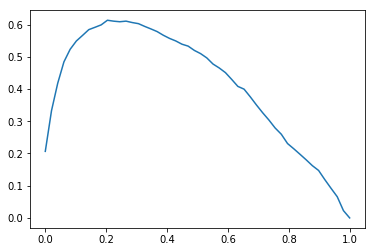

In [50]:
grid = np.linspace(0, 1, 50)
plt.plot(grid, [f1_score(y_test, y_predicted > item) for item in grid])

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
print('Test accuracy: ', accuracy_score(y_test, y_predicted > 0.2))
print('Test F measure: ', f1_score(y_test, y_predicted > 0.2))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))

Test accuracy:  0.8895362952172857
Test F measure:  0.6101113967437876
Test ROC-AUC:  0.9261746809900623
